In [1]:
# simple function

def calculate(x):
    return x*x

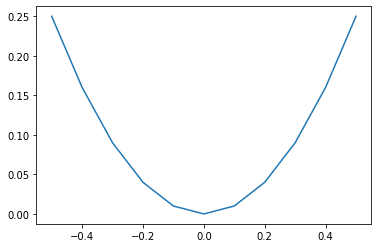

In [3]:
# demonstrate simple x^2 function

from matplotlib import pyplot

# simple function

def calculate(x):
    return x*x

# define inputs 

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

# calculate outputs

outputs = [calculate(x) for x in inputs]

# plot the result 

pyplot.plot(inputs, outputs)
pyplot.show()

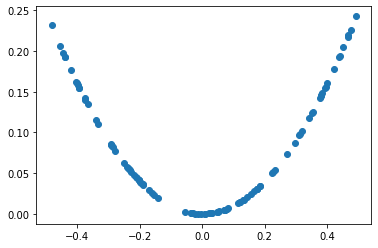

In [33]:
# example of generating random samples from x^2

from numpy.random import rand, randn
from numpy import hstack, zeros, ones
from matplotlib import pyplot

# generate random samples from x^2
def generate_samples(n=100):
    # generate random inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2 (quadratic)
    X2 = X1 * X1
    # stack arrays 
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    return hstack((X1, X2))

# generate samples
data = generate_samples()

# plot samples
pyplot.scatter(data[:,0], data[:,1])
pyplot.show()

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [24]:
# define the standalone discriminator model

def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                75        
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


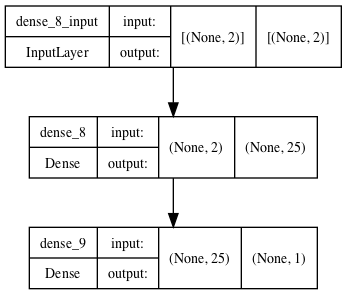

In [25]:
# define the discriminator model

model = define_discriminator()

model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
# generate n real samples with class labels 

def generate_real_samples(n):
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1, X2))
    # generate class labels
    y = ones((n,1))
    return X, y

In [27]:
# generate n fake samples with class labels 

def generate_fake_samples(n):
    # generate inputs in [-1, 1]
    X1 = -1 + rand(n)*2
    # generate outputs in [-1, 1]
    X2 = -1 + rand(n)*2
    # stack arrays
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = hstack((X1, X2))
    # generate class labels
    y = zeros((n,1))
    return X, y

In [28]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch/2)
    # run epochs manually
    for i in range(n_epochs):
        # generate real examples
        X_real, y_real = generate_real_samples(half_batch)
        # update model
        model.train_on_batch(X_real, y_real)
        # generate fake examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        # update model
        model.train_on_batch(X_fake, y_fake)
        # evaluate the model
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        print(i, acc_real, acc_fake)

In [29]:
model = define_discriminator()

train_discriminator(model)

0 0.0 0.953125
1 0.015625 0.9375
2 0.015625 0.90625
3 0.0 0.921875
4 0.03125 0.859375
5 0.03125 0.96875
6 0.015625 0.9375
7 0.015625 0.9375
8 0.0 0.953125
9 0.078125 0.921875
10 0.046875 0.875
11 0.046875 0.890625
12 0.078125 0.90625
13 0.015625 0.921875
14 0.0625 0.953125
15 0.046875 0.875
16 0.03125 0.921875
17 0.0625 0.90625
18 0.0625 0.9375
19 0.078125 0.953125
20 0.09375 0.953125
21 0.046875 0.953125
22 0.09375 0.890625
23 0.109375 0.890625
24 0.078125 0.96875
25 0.09375 0.9375
26 0.125 0.90625
27 0.09375 0.921875
28 0.0625 0.890625
29 0.0625 0.921875
30 0.125 0.984375
31 0.078125 0.9375
32 0.125 0.953125
33 0.078125 0.921875
34 0.109375 0.96875
35 0.140625 0.984375
36 0.109375 0.953125
37 0.140625 0.96875
38 0.15625 0.96875
39 0.109375 0.984375
40 0.1875 0.984375
41 0.15625 0.96875
42 0.125 1.0
43 0.234375 0.9375
44 0.140625 0.984375
45 0.1875 0.953125
46 0.1875 0.96875
47 0.15625 0.984375
48 0.1875 0.96875
49 0.15625 0.96875
50 0.28125 0.96875
51 0.140625 0.984375
52 0.140625 0.

In [30]:
# define the standalone generator model

def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                90        
                                                                 
 dense_13 (Dense)            (None, 2)                 32        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


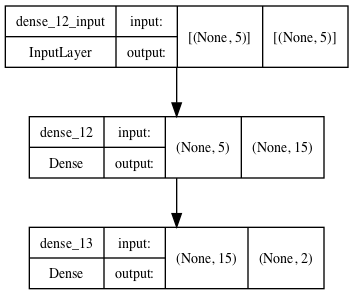

In [31]:
model = define_generator(5)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim*n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [35]:
# use the generator to generate n fake examples and plot the results 
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # plot results 
    pyplot.scatter(X[:,0], X[:,1])
    pyplot.show()

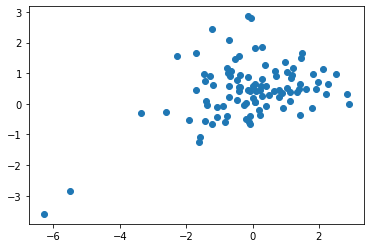

In [38]:
# size of the latent space
latent_dim = 5
# define the generator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

In [39]:
# define the combined generator and discriminator model, for updating the generator

def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    
    model.add(generator)
    model.add(discriminator)
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 2)                 122       
                                                                 
 sequential_10 (Sequential)  (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


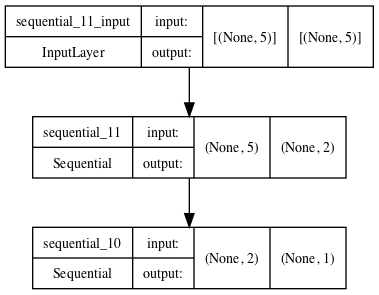

In [40]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
gan_model.summary()
plot_model(gan_model, to_file='gan_model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
# train the composite model

def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)

In [42]:
# train the generator and discriminator

def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake samples 
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in the latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_epochs)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch,1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)

In [44]:
# plot real and fake points

def summarize_performance(generator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # prepare fake samples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:,0], x_real[:,1], color='red')
    pyplot.scatter(x_fake[:,0], x_fake[:,1], color='blue')
    pyplot.show()

In [45]:
# evaluate the discriminator and plot real and fake points

def summarize_performance(epoch, generator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real samples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake samples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake samples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:,0], x_real[:,1], color='red')
    pyplot.scatter(x_fake[:,0], x_fake[:,1], color='blue')
    pyplot.show()